In [35]:
import nltk
import string
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import math
from wordcloud import WordCloud
import copy

In [64]:
# df = copy.copy(zillow)
def getNHood(df,nhoodList = []):
    nlist = []
    prev = 0
    # alist = []
    for i in range(len(df)):
        descText = df[i:i+1]["description"].squeeze()
        desc = descText.split(" ")
        
        for nhood in nhoodList:     # any(set(nhood).issubset(descText) 
                if nhood in descText:
                    nlist.append(nhood)
                    break
        if prev == 0 or nlist[-1] == prev:
                nlist[-1] = " "

        if len(nhoodList)==0:
            nlist = nlist[:-1]
            for word in range(len(desc)):
                if len(nlist) != 0:
                    prev = nlist[-1]
                
                print(desc[word])
                    
                if "neighborhood" in desc[word].lower():
                    fir = max(word-5,0)
                    las = min(word+5,len(desc))
                    # print(f"\n{desc[fir:las]}\n")
                    nlist.append(" ".join(desc[fir:las]))

                    break
                else:
                    continue
          
        if prev == 0 or nlist[-1] == prev:
                nlist[-1] = " "
            

        
                
        # print(f"nlist entry: {nlist[-1]}")
        if type(df[i:i+1]["neighborhood"].squeeze())!=type("help"):
            df[i:i+1]["neighborhood"] = nlist[-1]



    # print(df["neighborhood"])
    return df
    


In [63]:
input = "../webscraping_outputs-Z/clean/ZillowUnique.csv"
# input = "../webscraping_outputs-Z/clean/ZillowUnique_v1.csv"
try:
    zillowFull = pd.read_csv(input)
except FileNotFoundError:
    zillowFull = pd.read_csv("../webscraping_outputs-Z/best_pre_neighborhood/ZillowSelenium_2023_Dec_10_19-09-38")

# handle nans
zillow = zillowFull.drop(zillowFull.loc[zillowFull["description"].isna()].index) # can choose to fill them too, but better for frequencies
# get philly neighborhoods too
phl_nhoods = gpd.read_file("https://raw.githubusercontent.com/opendataphilly/open-geo-data/master/Neighborhoods_Philadelphia/Neighborhoods_Philadelphia.geojson")
nhoods = list(phl_nhoods["listname"])
zillow.head()



,title,address,neighborhood,description,url
0,LVL West,NaN,NaN,Centrally located in Philadelphia's bustling U...,https://www.zillow.com/apartments/philadelphia...
7,Hoffman B,NaN,NaN,We are a Full-Service Real Estate Management F...,https://www.zillow.com/apartments/philadelphia...
8,The York House 55 Plus,55 Plus,NaN,Discover the York HouseThe York House provides...,https://www.zillow.com/apartments/philadelphia...
9,Tustin Court,NaN,NaN,This updated apartment for rent is located at ...,https://www.zillow.com/apartments/philadelphia...
10,The Fletcher,NaN,NaN,Experience the extraordinary lifestyle at 1221...,https://www.zillow.com/apartments/philadelphia...


In [65]:
getNHood(zillow,nhoods)["neighborhood"]



C:\Users\timol\AppData\Local\Temp\ipykernel_13664\4174266682.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i:i+1]["neighborhood"] = nlist[-1]


0     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    NaN
51    NaN
52    NaN
53    NaN
54    NaN
55    NaN
56    NaN
57    NaN
58    NaN
59    NaN
60    NaN
61    NaN
62    NaN
Name: neighborhood, dtype: object

## NaN entries read as float - split() and strip() do not work

In [ ]:
 # test if there are any "" or NaN in description
for i in range(len(zillow["description"])):
    t = zillow["description"][i:i+1].squeeze()
    print(type(t))
    if type(t)!=type("help"): #"<class 'str'>"
        print(t)

In [7]:
punc = list(string.punctuation)
nltk.download("stopwords");
stop_words = list(set(nltk.corpus.stopwords.words("english")))

desc = zillow["description"].str.strip().tolist()
desc[:3]

words = [d.split() for d in desc]

flat_w = []
for wList in words:
    for w in wList:
        if w[-1] in string.punctuation:
            w = w[:-1]
        flat_w.append(w.lower())

no_stop = [w for w in flat_w if (w not in stop_words) and (w not in punc)]

words = pd.DataFrame({"words": no_stop}).groupby("words",as_index=False).size().sort_values("size",ascending=False,ignore_index=True)
words.head(15)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,words,size
0,home,463
1,room,340
2,living,331
3,space,293
4,new,285
5,kitchen,256
6,property,247
7,,233
8,floor,216
9,bedrooms,202


In [8]:
to_remove = ["home","room","kitchen","property","floor","bedrooms","bedroom","rooms",""]

test = words.drop(index = words.loc[words["words"].isin(to_remove)].index)

# print(len(test),len(words)-len(to_remove))

# words.to_csv("../base_words.csv", index = False)
# test.to_csv("../removeTest_words.csv", index = False)

In [14]:
test

,words,size
2,living,331
3,space,293
4,new,285
10,located,190
12,large,177
...,...,...
5527,old-world,1
5528,co.,1
5529,ole,1
5530,olea,1


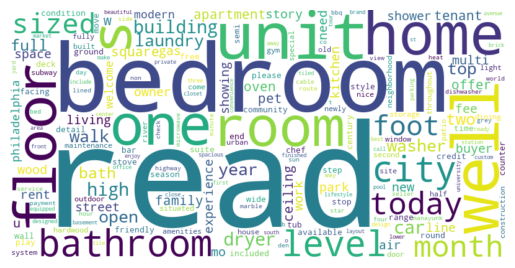

In [15]:
text = ' '.join(test["words"])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display the word cloud using matplotlib


# Format
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.show()

In [7]:
?pd.DataFrame.drop

Signature:
pd.DataFrame.drop(
    self,
    labels: 'IndexLabel' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel' = None,
    columns: 'IndexLabel' = None,
    level: 'Level' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by specifying directly index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the `user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list-like
    Alt

## Still need to take out the house-related words and make a list of neighborhood names and such

In [53]:
# words.loc[words["words"]endswith("s")]

AttributeError: 'Series' object has no attribute 'endswith'

In [55]:
# list(words["words"].squeeze()).endswith("s")

AttributeError: 'list' object has no attribute 'endswith'

## using the cluster stuff